# Втор парцијален испит по Основи на Вештачката Интелигенција - 1/2

**Датум**: 18.01.2023

## 1. Амазон
Ја разгледуваме задачата за играта Амазон, од аудиториските вежби.

### Прашања и задачи

Бидејќи дрвото на играта е мало, во решението од аудиториските се разгранува целото дрво. Сакаме да дознаеме колку вкупно состојби се разгрануваат при пребарувањето низ дрвото.

1.1. **(5 поени)** Без користење на калкулатор, дискутирајте на кој начин ќе процените колку состојби треба да се разгранат за да се истражи целото дрво на играта.
    

* Ако сакаме да го разграниме целото дрво, тогаш не треба да користиме алфа бета поткаструвањe, значи ќе ја користeме функцијата minimax во која не фигурираат алфа и бета.
    * Во функцијата ќе поставиме бројач кој ќе брои колку пати ќе се повикува таа функција. Бидејќи секоја состојба од дрвото се повикува еднаш, значи бројот на повикувања = бројот на состојби кои се разгрануваат

1.2. **(5 поени) (код)** Пресметајте колку точно состојби се разгрануваат за да се истражи целото дрво на играта?

In [3]:
# Funkciite gi izvadov od klasata Game, zatoa sto vo momentot bitno mi e samo da ja odredam vrednosta na counter 
# (ne sakam da ja igram samata igra i ne mi treba kodot za vizuelizacija)

In [4]:
from copy import deepcopy

In [5]:
scores = {'S': 1, 'P': -1}
N = 3

def minimax(node, player):
    global counter
    counter += 1
    winner = check_victory(node, 'S' if player == 'MAX' else 'P')
    if winner != 'keep_playing':
        return scores[winner], None
    best_value = 2 if player == 'MIN' else -2
    best_move = None
    for child, move in expand_state(node, player):
        other_player = 'MIN' if player == 'MAX' else 'MAX'
        result, _ = minimax(child, other_player)
        if player == 'MIN' and result < best_value:
            best_value = result
            best_move = move
        elif player == 'MAX' and result > best_value:
            best_value = result
            best_move = move
    return best_value, best_move

def find_queen(state, queen_symbol):
    for y in range(N):
        for x in range(N):
            if state[y][x] == queen_symbol:
                return x, y

def possible_moves(state, x, y):
    deltas = [
        (0, 1), (0, -1), (1, 0), (-1, 0),
        (1, 1), (1, -1), (-1, 1), (-1, -1)]
    for dx, dy in deltas:
        nx, ny = x + dx, y + dy
        while 0 <= nx < N and 0 <= ny < N:
            if state[ny][nx] == '·':
                yield nx, ny
            else:
                break
            nx += dx
            ny += dy

def possible_shots(state, x, y):
    shots = [
        (0, 1), (0, -1), (1, 0), (-1, 0),
        (1, 1), (1, -1), (-1, 1), (-1, -1)]
    for dx, dy in shots:
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < N:
            if state[ny][nx] == '·':
                yield nx, ny

def expand_state(state, player):
    symbol = 'S' if player == 'MAX' else 'P'
    qx, qy = find_queen(state, symbol)
    for px_move, py_move in possible_moves(state, qx, qy):
        state_after_move = list([list(row) for row in state])
        state_after_move[py_move][px_move] = symbol
        state_after_move[qy][qx] = '·'
        for px_shot, py_shot in possible_moves(state_after_move, px_move, py_move):
            state_after_shot = deepcopy(state_after_move)
            state_after_shot[py_shot][px_shot] = 'x'
            state_after_shot = tuple([tuple(row) for row in state_after_shot])
            yield state_after_shot, [qx, qy, px_move, py_move, px_shot, py_shot]

def other_queen_symbol(queen_symbol):
    return 'P' if queen_symbol == 'S' else 'S'

def check_victory(state, queen_to_move__symbol):
    queen_to_move__symbol
    qx, qy = find_queen(state, queen_to_move__symbol)
    if list(possible_moves(state, qx, qy)) == []:
        return other_queen_symbol(queen_to_move__symbol)
    return 'keep_playing'

In [6]:
counter = 0
# primer ova e nasata pocetna sostojba, a na red e MAX igracot
state = [
    ['·', '·', 'P'],
    ['·', '·', '·'],
    ['S', '·', '·'],
]

In [7]:
%%time
minimax(state, 'MAX')

CPU times: total: 13.7 s
Wall time: 14.1 s


(1, [0, 2, 0, 1, 1, 1])

In [8]:
counter

907652

1.3. **(5 поени)** Што е алфа-бета поткастрување? Зошто користиме алфа-бета поткастрување во оваа игра?

* Алфа-бета поткаструвањето е метода која се користи со цел да се минимизира бројот на состојби кои се испитуваат. Ова овозможува minimax алгоритмот да се извршува во пократко време, но притоа повторно секогаш да го дава точниот резултат (поткаструвањето ги елиминира гранките кои сигурно нема да се крајното решение).
* Алфа-бета поткаструвањето се користи во играта со цел компјутерот побрзо да може да го пресмета наредниот чекор што играчот треба да го направи. (поточно што побрзо да изврши minimax)

1.4. **(10 поени) (код)** Покажете дека користењето на постапката за алфа-бета поткастрување се исплати во оваа игра. На кој начин подобро ќе се покаже: (1) преку времето потребно за извршување на алгоритмите или (2) преку броење на разгранетите јазли?

In [17]:
scores = {'S': 1, 'P': -1}
N = 3

def minimax_alpha_beta(node, player, alpha=-2, beta=2):
    global counter
    counter += 1
    winner = check_victory(node, 'S' if player == 'MAX' else 'P')
    if winner != 'keep_playing':
        return scores[winner], None
    best_value = 2 if player == 'MIN' else -2
    best_move = None
    for child, move in expand_state(node, player):
        other_player = 'MIN' if player == 'MAX' else 'MAX'
        result, _ = minimax_alpha_beta(child, other_player, alpha, beta)
        if player == 'MIN':
            if result <= alpha:
                return result, best_move
            if result < beta:
                beta = result
            if result < best_value:
                best_value = result
                best_move = move
        elif player == 'MAX':
            if result >= beta:
                return result, best_move
            if result > alpha:
                alpha = result
            if result > best_value:
                best_value = result
                best_move = move
    return best_value, best_move

# podolnite funkcii se istite kako vo kodot od zadaca 1.2
def find_queen(state, queen_symbol):
    for y in range(N):
        for x in range(N):
            if state[y][x] == queen_symbol:
                return x, y

def possible_moves(state, x, y):
    deltas = [
        (0, 1), (0, -1), (1, 0), (-1, 0),
        (1, 1), (1, -1), (-1, 1), (-1, -1)]
    for dx, dy in deltas:
        nx, ny = x + dx, y + dy
        while 0 <= nx < N and 0 <= ny < N:
            if state[ny][nx] == '·':
                yield nx, ny
            else:
                break
            nx += dx
            ny += dy

def possible_shots(state, x, y):
    shots = [
        (0, 1), (0, -1), (1, 0), (-1, 0),
        (1, 1), (1, -1), (-1, 1), (-1, -1)]
    for dx, dy in shots:
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < N:
            if state[ny][nx] == '·':
                yield nx, ny

def expand_state(state, player):
    symbol = 'S' if player == 'MAX' else 'P'
    qx, qy = find_queen(state, symbol)
    for px_move, py_move in possible_moves(state, qx, qy):
        state_after_move = list([list(row) for row in state])
        state_after_move[py_move][px_move] = symbol
        state_after_move[qy][qx] = '·'
        for px_shot, py_shot in possible_moves(state_after_move, px_move, py_move):
            state_after_shot = deepcopy(state_after_move)
            state_after_shot[py_shot][px_shot] = 'x'
            state_after_shot = tuple([tuple(row) for row in state_after_shot])
            yield state_after_shot, [qx, qy, px_move, py_move, px_shot, py_shot]

def other_queen_symbol(queen_symbol):
    return 'P' if queen_symbol == 'S' else 'S'

def check_victory(state, queen_to_move__symbol):
    queen_to_move__symbol
    qx, qy = find_queen(state, queen_to_move__symbol)
    if list(possible_moves(state, qx, qy)) == []:
        return other_queen_symbol(queen_to_move__symbol)
    return 'keep_playing'

In [18]:
counter = 0
# primer ova e nasata pocetna sostojba, a na red e MAX igracot
state = [
    ['·', '·', 'P'],
    ['·', '·', '·'],
    ['S', '·', '·'],
]

In [19]:
%%time
minimax_alpha_beta(state, 'MAX')

CPU times: user 147 ms, sys: 0 ns, total: 147 ms
Wall time: 146 ms


(1, [0, 2, 0, 1, 1, 1])

In [20]:
counter

11147

* и преку времето и преку бројачот, очигледна е разликата што алфа бета поткаструвањето ја прави. Бројачот од околу 900.000 сега е околу 11.000, а времето од 11.5 секунди сега е од редот на милисекунди.

Целото дрво брзо се истражува на компјутер од 2022 година. Во продолжение разгледуваме случај кога овој алгоритам се поставува на компјутер кој нема доволно пресметковна моќ и мемориски ресурси за да го пребара целото дрво во логично време за еден потег. Ова е случај кога таблата наместо 3х3 ќе биде 6х6. Стандардната постапка во овој случај е да се ограничи длабочината до која пребарува алгоритамот, па тогаш да се проценува исходот од играта преку функција за евристика.

1.5. **(20 поени) (код)** Предложете функција за проценка на победникот (евристика) за оваа игра. Имплементирајте ја во код. Функцијата може да се напише без да ја тестирате со готовата игра од аудиториските вежби. Важно е да се објасни секоја логичка целина од кодот на функцијата која ќе ја напишете.

In [1]:
# Nekoi funckii go sodrzat zborot evolved bidejki koga go pisuvav kodot za natprevarot, prvo imav polosi verzii od ovie funkcii.
# Ne sakam da gi smenam iminjata bidejki nekade mozi ke zaboravam da smenam i se javi problem.

# ispituva dali kralicata moze vo eden poteg da stigni do goal_position
# ovaa funkcija e potrebna za ponatamu da se iskoristi vo how_many_squares_in_one_move_evolved
def can_reach_directly_evolved(goal_position, queen_position, state):
    gx, gy = goal_position
    qx, qy = queen_position
    if qy == gy: # ako kralicite se naogjaat vo ista kolona
        minx, maxx = (qx, gx) if qx < gx else (gx, qx)
        for x in range(minx+1, maxx):
            if state[qy][x] != '·': # ako izmegu dvete kralici ima precka
                return False
        return True # ako izmegu dvete kralici nema precki
    
    if qx == gx: # ako kralicite se naogjaat na ista redica
        miny, maxy = (qy, gy) if qy < gy else (gy, qy)
        for y in range(miny+1, maxy):
            if state[y][qx] != '·':
                return False
        return True
    
    if qx-qy == gx-gy: # na glavna dijagonala
        minx, maxx, miny = (qx, gx, qy) if qx < gx else (gx, qx, gy)
        for i in range(1, maxx-minx):
            if state[miny+i][minx+i] != '·':
                return False
        return True
    
    if qx+qy == gx+gy: # na sporedna dijagonala
        minx, maxx, miny = (qx, gx, qy) if qx < gx else (gx, qx, gy)
        for i in range(1, maxx-minx):
            if state[miny-i][minx+i] != '·':
                return False
        return True
    
    return False
   
# do kolku polinja kralicata moze da stigne vo eden poteg
def how_many_squares_in_one_move_evolved(state, queen_position):
    how_many = 0
    for row_index, row in enumerate(state):
        for col_index, element in enumerate(row):
            if element == '·':
                if can_reach_directly_evolved((col_index, row_index), queen_position, state):
                    how_many += 1
    return how_many
            

# ispituva koja kralica ima poveke mobilnost (moze vo eden poteg da stigne do poveke polinja).
# na izlez se vraka odreden score koj e megu -1 i 1 (ako e negativen broj, MIN kralicata ima
# prednost. Ako e pozitiven, MAX kralicata e vo prednost
def mobility(state):
    s_position = find_queen(state, 'S')
    p_position = find_queen(state, 'P')
    s_mobility = how_many_squares_in_one_move_evolved(state, s_position)
    p_mobility = how_many_squares_in_one_move_evolved(state, p_position)
    return (s_mobility - p_mobility) / 19 # najmnogu ima do 19 polinja mobilnost
                                          # toa e ako kralicata se naogja vo centarot na 6x6 tabla

def chebyshev(pos_1, pos_2):
    x1, y1 = pos_1
    x2, y2 = pos_2
    return max(abs(x1-x2), abs(y1-y2))


# Ispituva koja kralica e poblisku do odredeno pole t.e. go *poseduva* toa pole
# Ne e precizno bidejki ne zema vo predvid dali ima iksovci izmegu kralicata i odredenoto pole
def who_owns_square(state, square_position):
    s_position = find_queen(state, 'S')
    p_position = find_queen(state, 'P')
    s_dist = chebyshev(s_position, square_position)
    p_dist = chebyshev(p_position, square_position)
    if s_dist == p_dist:
        return 0
    return 1 if s_dist < p_dist else -1


# Kazuva koja kralica e vo prednost, koga se raboti za brojot na polinja koi tie gi poseduvaat
# Kralicata koja poseduva poveke polinja e vo prednost
def territory(state):
    score = 0
    how_many_squares = 0
    for row_index, row in enumerate(state):
        for col_index, element in enumerate(row):
            if element == '·':
                how_many_squares += 1 # how_many_squares na krajot ke pokazuva kolku vkupno prazni polinja ima na tablata
                score += who_owns_square(state, (col_index, row_index))
    return score / how_many_squares


# Kazuva kolku polinja direktno okolu kralicata se slobodni, podeleno so 8
# (bidejki maksimum 8 polinja moze da se slobodni okolu kralicata
def freedom_queen(state, symbol):
    N = len(state)
    how_many = 0
    x, y = find_queen(state, symbol)
    deltas = [
        (0, 1), (0, -1), (1, 0), (-1, 0),
        (1, 1), (1, -1), (-1, 1), (-1, -1)
    ]
    for dx, dy in deltas:
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < N and state[ny][nx] == '·':
            how_many += 1
            nx += dx
            ny += dy
    return how_many/8


# Dava score za koja kralica e poslobodna
# Poslobodna e onaa kralica koja ima poveke polinja direktno okolu nea
def freedom(state):
    freedom_s = freedom_queen(state, 'S')
    freedom_p = freedom_queen(state, 'P')
    return freedom_s - freedom_p


# Konecnata evaluation function. Broevite se zemeni so testiranje.
def evaluate_state(state, symbol):
    return (3*mobility(state) + territory(state) + freedom(state)) / 5

# Испит по Основи на Вештачката Интелигенција - 2/2

**Датум**: 18.01.2023

## 2. Бело вино

Разгледуваме множество податоци за бело вино. Целта е да умееме да разликуваме лошо, добро и одлично вино, имајќи го предвид хранливиот состав на производот. Податоците со кои располагаме се дадени во табелата подолу.

In [10]:
import pandas as pd

In [12]:
df = pd.read_csv('winequality-white.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [13]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Задача 2.1
**(5 поени)** Објаснете на кој начин ни помага функцијата за ентропија кај дрвата за одлучување.

* Entropijata se koristi za odreduvanje na informaciska pridobivka
    * se odreduva koja podelba ni dava najgolema informaciska pridobivka, t.e. koja podelba ke e optimalna, i vo sledniot cekor drvoto se deli po taa optimalna podelba.
    * Informaciskata pridobivka e razlika pomegu entropijata posle podelbata i entropijata na podatocnoto mnozestvo pred podelbata.

### Задача 2.2
**(5 поени) (код)** Поделете го податочното множество на два дела. Поголемиот дел нека е 70% и ќе служи за тренирање, а помалиот дел од 30% ќе служи за проверка на повединието на алгоритмите кои ќе ги имплементирате понатаму.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df[['quality']]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=3, test_size=0.3)

### Задача 2.3
**(5 поени) (код)** Исцртајте ги на график вината така што на x оската ќе биде ph вредноста, на y оската ќе биде алкохолот, а квалитетот на вината ќе биде претставен со боја или симбол.

**Совет**: За помош може да го искористите третиот пример `Setting size and color with column names` од [документацијата](https://plotly.com/python/line-and-scatter/) на плотли.

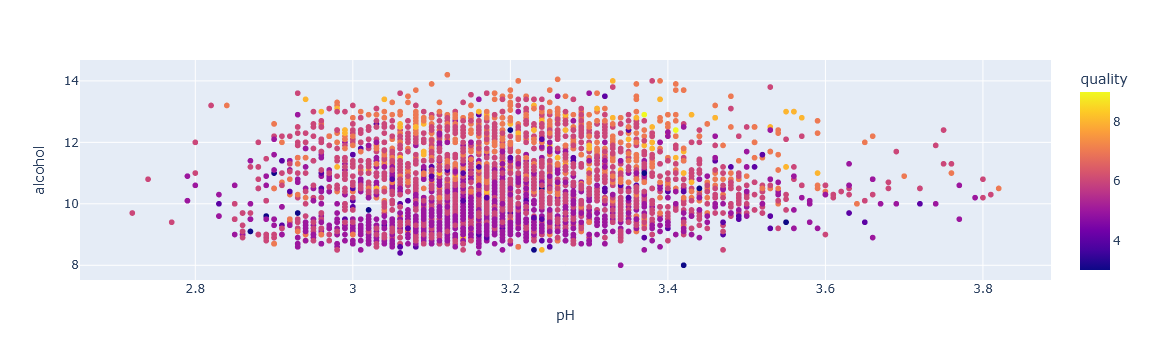

In [19]:
import plotly.express as px
fig = px.scatter(df, x="pH", y="alcohol", color="quality",)
fig.show()

### Задача 2.4
**(5 поени) (код)** Користејќи ја библиотеката `sklearn`,  вчитајте класификатор - дрво за одлучување, претставен преку класата `DecisionTreeClassifier`, а потоа вметнете ги податоците за тренирање од вториот чекор за да ја истренирате мрежата.

- [Пример за дрва за одлучување од sklearn](https://scikit-learn.org/stable/modules/tree.html)
- [Документација за Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [20]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf.fit(x_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the cu

### Задача 2.5
**(10 поени) (код)** Пресметајте ја прецизноста на алгоритамот за податоците кои тој ги нема видено (на кои нема тренирано). Потоа пресметајте ја прецизноста на алгоритамот за податоците кои ги има видено (на кои има тренирано). Споредете ги резултатите. Ви изгледаат ли во ред?

In [21]:
print('Accuracy score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Accuracy score on test data:  0.6
Accuracy score on train data:  1.0


### Задача 2.6
**(5 поени) (код)** Кои вина алгоритамот успева да ги распознава подобро, оние со висок процент на алкохол (над 10.5%), или оние со низок процент на  алкохол (под 10.5%)?

In [98]:
df['alcohol_over_10_5'] = df['alcohol'] > 10.5
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,alcohol_over_10_5
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,добро,False
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,добро,False
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,добро,False
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,добро,False
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,добро,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,добро,False
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,добро,True
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,добро,True
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,лошо,False


In [99]:
# za alcohol_over_10_5
df_over_10_5 = df.query('alcohol_over_10_5 == True')
x = df_over_10_5[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df_over_10_5[['quality']]

In [100]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=155, test_size=0.3)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Accuracy Score on test data:  0.8674884437596302
Accuracy Score on train data:  0.8756613756613757


In [101]:
# za alcohol_under_10_5
df_under_10_5 = df.query('alcohol_over_10_5 == False')
x = df_under_10_5[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df_under_10_5[['quality']]

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=155, test_size=0.3)
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=clf.predict(x_test)))
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))

Accuracy Score on test data:  0.9073170731707317
Accuracy Score on train data:  0.9001568217459488


* sleduva deka malku podobra preciznost ima vo slucajot so vinata koi imaat nizok procent na alkoholot

### Задача 2.7
**(5 поени)** Зошто за алгоритамот ID3 за градење на дрво се вели дека е алчен алгоритам?

* ID3 algoritmot e alcen bidejki drvoto za odlucuvanje go deli na alcen nacin
    * toa znaci deka so sekoja iteracija, algoritmot alcno ja bara **optimalnata podelba** (onaa koja ke dovede do najgolema informaciska pridobivka)

### Задача 2.8
**(5 поени)** Колку се квалитетни вината од податочното множество од датотеката `winequality-white-test.csv`?

In [103]:
df = pd.read_csv('winequality-white-test.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6
1,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4
2,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8
3,6.0,0.21,0.38,0.8,0.020,22,98,0.98941,3.26,0.32,11.8


In [104]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
clf.predict(x)

array(['лошо', 'лошо', 'одлично', 'лошо'], dtype=object)

* algoritmot predviduva dela vinoto so indeks 2 e odlicno, a ostanatite 3 se losi

### Задача 2.9
**(10 поени)** Исцртајте го дрвото, до длабочина 3!

In [105]:
df = pd.read_csv('winequality-white.csv')
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
        'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 
        'pH', 'sulphates', 'alcohol']]
y = df[['quality']]

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(x, y)

[Text(0.531679631080948, 0.9782608695652174, 'x[10] <= 10.85\nentropy = 1.857\nsamples = 3428\nvalue = [12.0, 119.0, 1027.0, 1520.0, 638.0, 109.0, 3.0]'),
 Text(0.3481655943627451, 0.9347826086956522, 'x[1] <= 0.282\nentropy = 1.666\nsamples = 2174\nvalue = [9.0, 90.0, 908.0, 943.0, 198.0, 25.0, 1.0]'),
 Text(0.4399226127218465, 0.9565217391304348, 'True  '),
 Text(0.18794588147759103, 0.8913043478260869, 'x[1] <= 0.207\nentropy = 1.673\nsamples = 1389\nvalue = [5.0, 32.0, 437.0, 706.0, 183.0, 25.0, 1.0]'),
 Text(0.1094625350140056, 0.8478260869565217, 'x[7] <= 0.998\nentropy = 1.708\nsamples = 518\nvalue = [1, 11, 100, 280, 109, 17, 0]'),
 Text(0.07522759103641456, 0.8043478260869565, 'x[9] <= 0.525\nentropy = 1.604\nsamples = 437\nvalue = [1.0, 11.0, 97.0, 247.0, 77.0, 4.0, 0.0]'),
 Text(0.03700980392156863, 0.7608695652173914, 'x[3] <= 2.95\nentropy = 1.634\nsamples = 290\nvalue = [1, 7, 82, 156, 40, 4, 0]'),
 Text(0.017086834733893556, 0.717391304347826, 'x[5] <= 15.5\nentropy = 1.

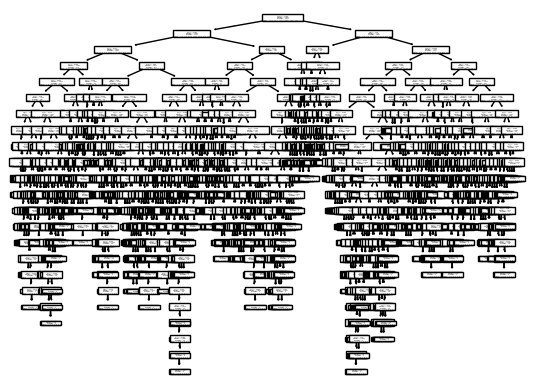

In [22]:
# ne mi rabotese ova bidejki ne mozev da instaliram matplotlib
from sklearn import tree
tree.plot_tree(clf)

In [23]:
from sklearn.tree import export_text
r = export_text(clf, max_depth=3)
print(r)

|--- feature_10 <= 10.85
|   |--- feature_1 <= 0.28
|   |   |--- feature_1 <= 0.21
|   |   |   |--- feature_7 <= 1.00
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- feature_7 >  1.00
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- feature_1 >  0.21
|   |   |   |--- feature_10 <= 9.85
|   |   |   |   |--- truncated branch of depth 15
|   |   |   |--- feature_10 >  9.85
|   |   |   |   |--- truncated branch of depth 19
|   |--- feature_1 >  0.28
|   |   |--- feature_1 <= 0.48
|   |   |   |--- feature_5 <= 15.50
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- feature_5 >  15.50
|   |   |   |   |--- truncated branch of depth 15
|   |   |--- feature_1 >  0.48
|   |   |   |--- feature_3 <= 2.15
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- feature_3 >  2.15
|   |   |   |   |--- truncated branch of depth 7
|--- feature_10 >  10.85
|   |--- feature_5 <= 11.50
|   |   |--- feature_2 <= 0.24
|   |   |   |--- feature_7 <= 0.